Import des librairies

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

Récupérer les données avec Alpha Vintage

In [52]:
apikey = "270E1RIWIZ5ZK8A2"

# Liste des actifs à analyser avec leurs symboles Alpha Vantage
actifs = {
    "Bitcoin": "BTCUSD",  # Bitcoin en dollars
    "Or": "XAUUSD",  # Prix de l'or en dollars
    "S&P 500": "SPY"  # ETF du S&P 500
}

# Dictionnaire pour stocker les données
resultats = {}

for nom, symbole in actifs.items():
    # Requête API pour récupérer les données mensuelles
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={symbole}&apikey={apikey}"
    r = requests.get(url)
    data = r.json()

    # Extract des données
    time_series = data.get("Monthly Time Series", {})

    # Transf les données en DataFrame
    df = pd.DataFrame.from_dict(time_series, orient="index")

    # Renommer les colonnes en français
    df.columns = ["Ouverture", "Haut", "Bas", "Clôture", "Volume"]

    # Convertir l'index en datetime
    df.index = pd.to_datetime(df.index)

    # Ajouter des colonnes "Année" et "Mois"
    df["Année"] = df.index.year
    df["Mois"] = df.index.month

    # Filtrer les données pour les 4 dernières années
    df = df[df.index >= "2020-01-01"]

    # Trier par date (du plus ancien au plus récent)
    df = df.sort_index()

    df = df[["Année", "Mois", "Ouverture", "Haut", "Bas", "Clôture", "Volume"]]

    # Stocker dans le dict
    resultats[nom] = df

    # Sauvegarde en CSV
    df.to_csv(f"{nom}_5_ans_par_mois.csv", index=False)

# Afficher un exemple de résultat pour Bitcoin
print(resultats["Bitcoin"])

            Année  Mois    Ouverture         Haut         Bas      Clôture  \
2020-01-31   2020     1    7190.6005    9574.4994   6870.7240    9350.8328   
2020-02-29   2020     2    9350.4719   10503.1782   8440.7014    8525.9295   
2020-03-31   2020     3    8527.1303    9195.2664   3836.9059    6413.0223   
2020-04-30   2020     4    6415.3477    9461.1138   6153.4737    8623.0469   
2020-05-31   2020     5    8621.6808   10067.3335   8125.3912    9448.1873   
...           ...   ...          ...          ...         ...          ...   
2024-10-31   2024    10   63317.1173   73611.7879  58919.4223   70205.1188   
2024-11-30   2024    11   70203.7695   99815.8387  66791.8510   96464.5682   
2024-12-31   2024    12   96469.4654  108353.1197  91312.4134   93390.5555   
2025-01-31   2025     1   93376.2698  109349.9753  89116.8579  102409.6846   
2025-02-13   2025     2  102415.4928  102773.0727  10000.0000   95570.0364   

             Volume  
2020-01-31  2343316  
2020-02-29  2318820

Pre-processing des données

In [53]:
# Charger les fichiers CSV
bitcoin = pd.read_csv("Bitcoin_5_ans_par_mois.csv")
gold = pd.read_csv("Or_5_ans_par_mois.csv")
sp500 = pd.read_csv("S&P 500_5_ans_par_mois.csv")

# Ajouter une colonne "Actif" pour identifier les données
bitcoin["Actif"] = "Bitcoin"
gold["Actif"] = "Or"
sp500["Actif"] = "S&P 500"

# Fusionner toutes les données en un seul DataFrame
df_total = pd.concat([bitcoin, gold, sp500])
print(df_total.head())

# Vérification des types de données
print("\n Types de données :")
print(df_total.dtypes)

# Vérification des données manquantes
print("\n Données manquantes :")
print(df_total.isnull().sum())

# Vérification des doublons
print("\n Nombre de doublons :")
print(df_total.duplicated().sum())

# Affichage des doublons s'ils existent
if df_total.duplicated().sum() > 0:
    print("\n Doublons trouvés :")
    print(df_total[df_total.duplicated()])



   Année  Mois  Ouverture        Haut        Bas    Clôture   Volume    Actif
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin

 Types de données :
Année          int64
Mois           int64
Ouverture    float64
Haut         float64
Bas          float64
Clôture      float64
Volume         int64
Actif         object
dtype: object

 Données manquantes :
Année        0
Mois         0
Ouverture    0
Haut         0
Bas          0
Clôture      0
Volume       0
Actif        0
dtype: int64

 Nombre de doublons :
0


Analyse exploratoire des données

In [54]:
print("Statistiques Bitcoin :\n", bitcoin.describe(), "\n")
print("Statistiques Or :\n", gold.describe(), "\n")
print("Statistiques S&P 500 :\n", sp500.describe(), "\n")

Statistiques Bitcoin :
              Année       Mois      Ouverture           Haut           Bas  \
count    62.000000  62.000000      62.000000      62.000000     62.000000   
mean   2022.096774   6.338710   37515.847037   43553.586400  31649.983465   
std       1.500925   3.538748   22939.301803   25916.639273  19479.851809   
min    2020.000000   1.000000    6415.347700    9195.266400   3836.905900   
25%    2021.000000   3.000000   19902.849800   24141.486425  17585.686925   
50%    2022.000000   6.000000   33880.945000   40654.171150  28754.608850   
75%    2023.000000   9.000000   54492.534800   63486.403500  42928.794775   
max    2025.000000  12.000000  102415.492800  109349.975300  91312.413400   

             Clôture        Volume  
count      62.000000  6.200000e+01  
mean    38941.824553  2.631965e+06  
std     23755.908634  2.778254e+06  
min      6413.022300  1.795960e+05  
25%     20160.187725  5.472108e+05  
50%     34853.220550  1.800994e+06  
75%     57525.764900  3

Actif
Bitcoin    31617.854947
Or           446.420621
S&P 500      101.412844
dtype: float64


C:\Users\bd_ta\AppData\Local\Temp\ipykernel_25884\3587394262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")


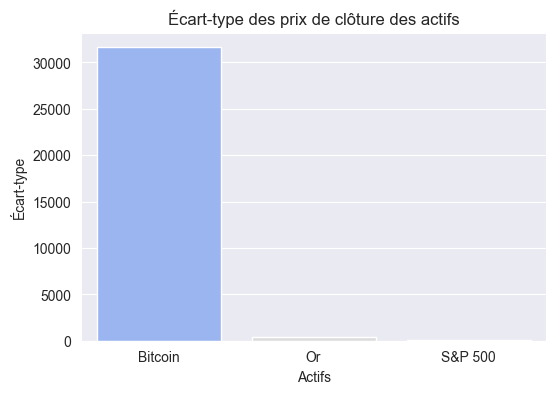

In [55]:
# Créer la table pivot avec les prix de clôture par actif
df_pivot = df_total.pivot_table(index='Année', columns='Actif', values='Clôture', aggfunc='mean')

# Calculer l'écart-type pour chaque actif
ecart_type = df_pivot.std()

# Afficher les résultats
print(ecart_type)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=ecart_type.index, y=ecart_type.values, palette="coolwarm")
plt.title("Écart-type des prix de clôture des actifs")
plt.ylabel("Écart-type")
plt.xlabel("Actifs")
plt.show()

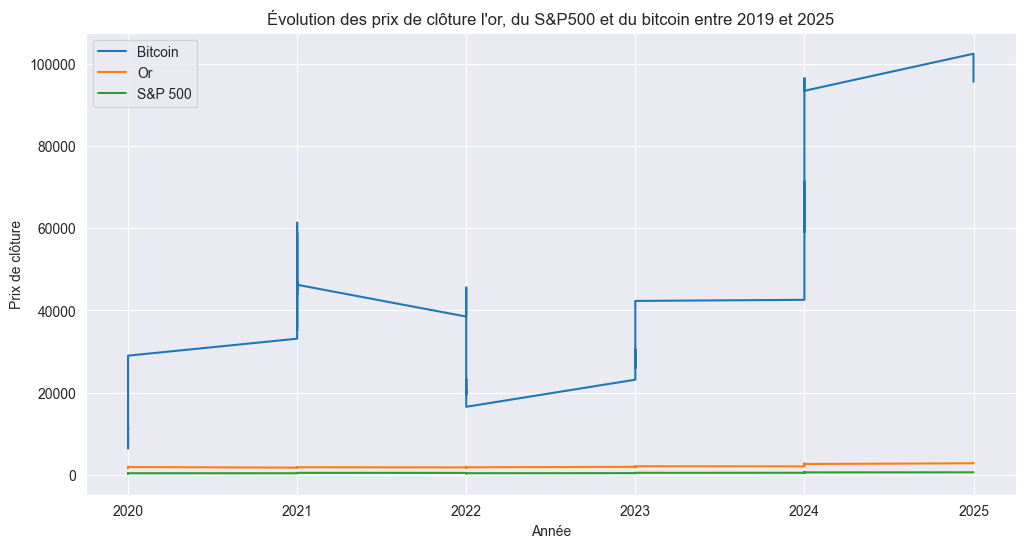

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for actif in df_total['Actif'].unique():
    subset = df_total[df_total['Actif'] == actif]
    plt.plot(subset['Année'], subset['Clôture'], label=actif)

plt.legend()
plt.title("Évolution des prix de clôture l'or, du S&P500 et du bitcoin entre 2019 et 2025")
plt.xlabel("Année")
plt.ylabel("Prix de clôture")
plt.show()

      Actif  Année  Rendement
0   Bitcoin   2020        NaN
1   Bitcoin   2020  -0.088217
2   Bitcoin   2020  -0.247821
3   Bitcoin   2020   0.344615
4   Bitcoin   2020   0.095690
..      ...    ...        ...
57  S&P 500   2024  -0.008924
58  S&P 500   2024   0.059634
59  S&P 500   2024  -0.027334
60  S&P 500   2025   0.026856
61  S&P 500   2025   0.002559

[179 rows x 3 columns]


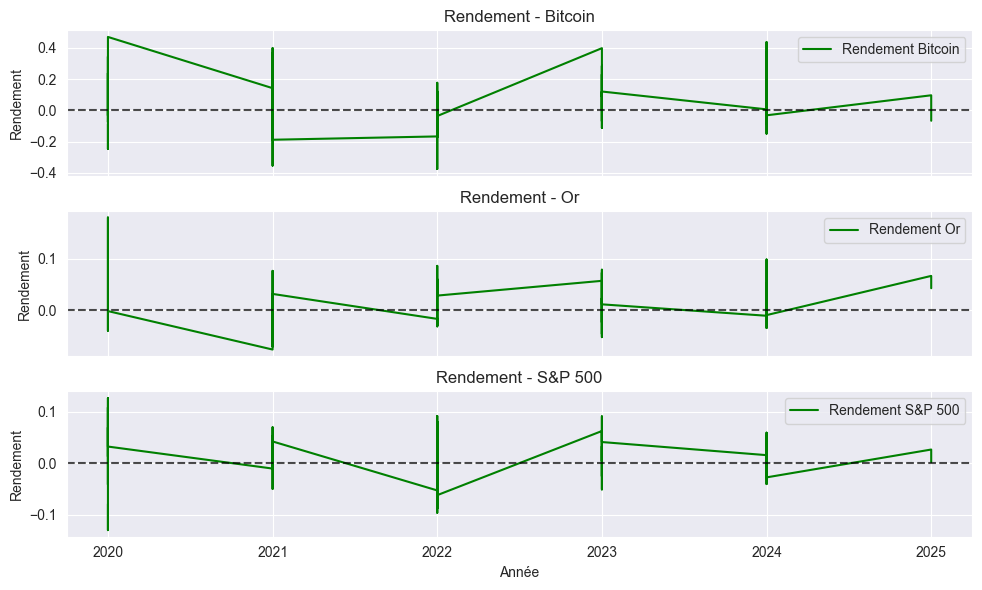

In [57]:
#(Prix de vente - prix d'achat)/prix d'achat
#Méthode .pct_change()

# Conversion en numérique
df_total['Clôture'] = pd.to_numeric(df_total['Clôture'], errors='coerce')

# Calcul du rendement
df_total['Rendement'] = df_total.groupby('Actif')['Clôture'].pct_change()

#Rendement quotidien sous forme de tableau
print(df_total[['Actif', 'Année', 'Rendement']])

df_total['Rendement'] = df_total.groupby('Actif')['Clôture'].pct_change()

# Création des sous-graphes (1 par actif)
fig, axes = plt.subplots(len(df_total['Actif'].unique()), 1, figsize=(10, 6), sharex=True)

for ax, actif in zip(axes, df_total['Actif'].unique()):
    subset = df_total[df_total['Actif'] == actif]
    ax.plot(subset['Année'], subset['Rendement'], label=f'Rendement {actif}', color='green')

    ax.set_title(f'Rendement - {actif}')
    ax.axhline(0, linestyle='--', color='black', alpha=0.7)  # Ligne zéro pour repère
    ax.legend()
    ax.set_ylabel('Rendement')

plt.xlabel('Année')
plt.tight_layout()
plt.show()


Nouvelles valeurs à calculer

In [58]:
#Check des valeurs déjà présentes
print(df_total.head())  
print(df_total.columns)  


   Année  Mois  Ouverture        Haut        Bas    Clôture   Volume    Actif  \
0   2020     1  7190.6005   9574.4994  6870.7240  9350.8328  2343316  Bitcoin   
1   2020     2  9350.4719  10503.1782  8440.7014  8525.9295  2318820  Bitcoin   
2   2020     3  8527.1303   9195.2664  3836.9059  6413.0223  5955546  Bitcoin   
3   2020     4  6415.3477   9461.1138  6153.4737  8623.0469  3525791  Bitcoin   
4   2020     5  8621.6808  10067.3335  8125.3912  9448.1873  3749452  Bitcoin   

   Rendement  
0        NaN  
1  -0.088217  
2  -0.247821  
3   0.344615  
4   0.095690  
Index(['Année', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Clôture', 'Volume',
       'Actif', 'Rendement'],
      dtype='object')


In [59]:
#Calcul de la volatilité
df_total['Volatilité'] = df_total.groupby('Actif')['Rendement'].rolling(window=14).std().reset_index(level=0, drop=True)


# Calcul du RSI (avec une bonne gestion du groupby)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Appliquer la fonction par groupe
df_total['RSI'] = df_total.groupby('Actif')['Clôture'].transform(compute_rsi)


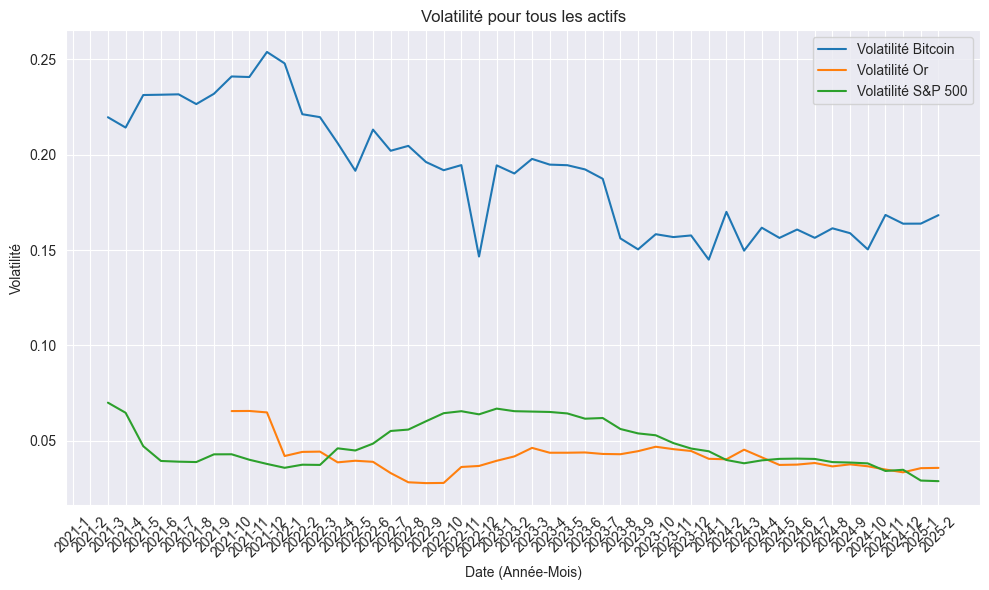

In [60]:
# Création du graphique pour la volatilité
plt.figure(figsize=(10, 6))

# Tracer la volatilité pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Année"].astype(str) + "-" + subset["Mois"].astype(str), subset["Volatilité"], label=f"Volatilité {actif_a_afficher}")

# Personnalisation du graphique
plt.title("Volatilité pour tous les actifs")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("Volatilité")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


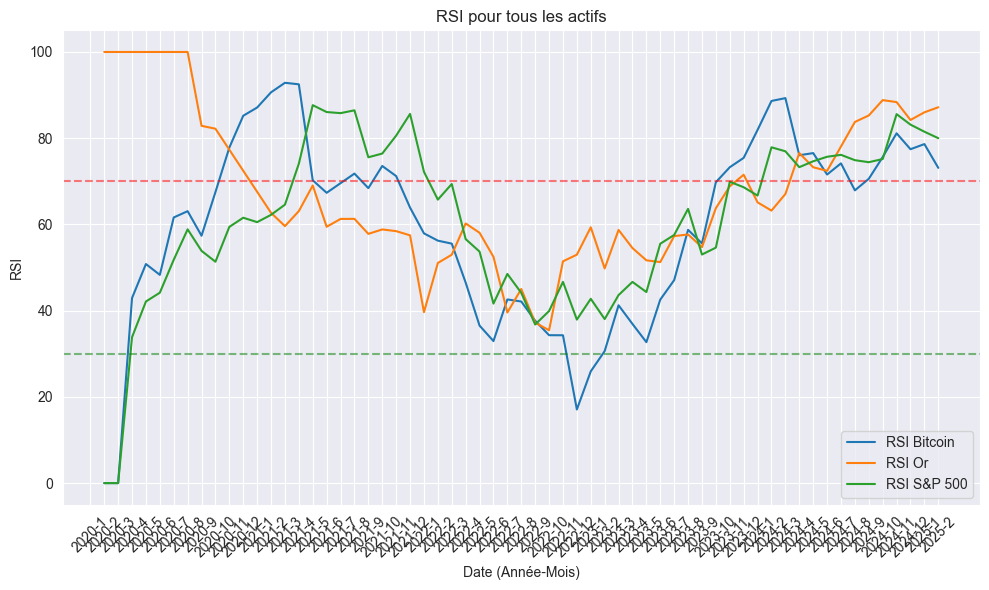

In [61]:
# Création du graphique avec "Année" et "Mois"
plt.figure(figsize=(10, 6))

# Tracer le RSI pour chaque actif
for actif_a_afficher in df_total["Actif"].unique():
    subset = df_total[df_total["Actif"] == actif_a_afficher]
    plt.plot(subset["Année"].astype(str) + "-" + subset["Mois"].astype(str), subset["RSI"], label=f"RSI {actif_a_afficher}")

# Ajouter les lignes de surachat et survente
plt.axhline(70, linestyle="--", color="red", alpha=0.5)  # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.5)  # Survente

# Personnalisation du graphique
plt.title("RSI pour tous les actifs")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Machine learning - Prédiction du prix de clôture pour l'or

Evolution du cours de l'or actuellement

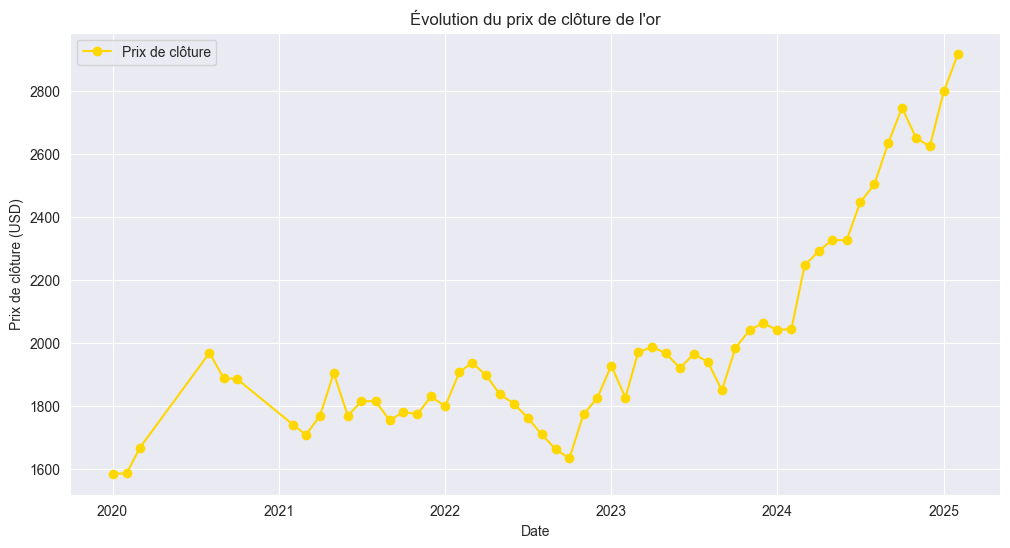

In [62]:
# Charger les données de l'or
gold = pd.read_csv("Or_5_ans_par_mois.csv")

# Vérifier le format de la colonne 'Année' et 'Mois' pour créer une date
gold["Date"] = pd.to_datetime(gold["Année"].astype(str) + "-" + gold["Mois"].astype(str))

# Tracer l'évolution du prix de clôture
plt.figure(figsize=(12,6))
plt.plot(gold["Date"], gold["Clôture"], marker='o', linestyle='-', color='gold', label="Prix de clôture")

# Personnalisation du graphique
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.title("Évolution du prix de clôture de l'or")
plt.legend()
plt.grid(True)

plt.show()


Importation des librairies

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df_total.columns)  # Vérification des variables présentes dans le df

Index(['Année', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Clôture', 'Volume',
       'Actif', 'Rendement', 'Volatilité', 'RSI'],
      dtype='object')


Sélection des colonnes de caractéristiques et de la target

In [64]:
#Séparation des données par actif (Bitcoin, Or, S&P 500)
bitcoin_data = df_total[df_total['Actif'] == 'Bitcoin']
gold_data = df_total[df_total['Actif'] == 'Or']
sp500_data = df_total[df_total['Actif'] == 'S&P 500']

#Séparation des données par année pour l'entraînement et la prédiction
train_data_gold = gold_data[gold_data['Année'] < 2024] #Données entraînement de 2020 à 2024
test_data_gold = gold_data[gold_data['Année'] == 2024] #Données à prédire = 2024

features = ["RSI", "Rendement", "Haut", "Bas", "Ouverture", "Volatilité"]
X_train_gold = train_data_gold[features]
y_train_gold = train_data_gold['Clôture']
X_test_gold = test_data_gold[features]
y_test_gold = test_data_gold['Clôture']

X_gold = gold_data[features]  # Variables indépendantes
y_gold = gold_data['Clôture']  # Variable cible

# Suppression des lignes contenant des NaN
X_train_gold = X_train_gold.dropna()
y_train_gold = y_train_gold[X_train_gold.index]  # Met à jour y_train_gold pour avoir les mêmes indices

# Supprimer les lignes avec NaN dans les deux jeux de données
df_gold = df_total[df_total['Actif'] == 'Or'].dropna(subset=['Clôture', 'RSI', 'Rendement', 'Haut', 'Bas', 'Ouverture', 'Volatilité'])
X_gold = df_gold[['Ouverture', 'Haut', 'Bas', 'RSI', 'Volatilité', 'Rendement']]
y_gold = df_gold['Clôture']



Diviser les données en test et train (pas utile car séparation en fonction de l'année)

In [65]:
#X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X_gold,y_gold, test_size=0.2, random_state=42)

#Suppression des NaN pour faire fonctionner le modèle
#df_total = df_total.dropna()


Choix du modèle et entraînement 

In [66]:
model_gold = LinearRegression()
model_gold.fit(X_train_gold, y_train_gold)

#Prédiction sur l'ensemble de test
y_pred = model_gold.predict(X_test_gold)

print(X_train_gold.columns)

Index(['RSI', 'Rendement', 'Haut', 'Bas', 'Ouverture', 'Volatilité'], dtype='object')


Prédictions du modèle

In [67]:
y_pred_gold = model_gold.predict(X_test_gold)

Validation croisée

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gold, X_gold, y_gold, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation croisée : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")


Scores de validation croisée : [ -86.91405261 -344.33177577  -26.48967747 -100.65047201 -685.16802299]
RMSE moyen : 13.846789435665823


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
 
#Calcul de l'erreur MSE et du score R²**
test_mse = mean_squared_error(y_test_gold, y_pred_gold)
test_r2 = r2_score(y_test_gold, y_pred_gold)

print(test_mse)
print(test_r2)

355.7614167266299
0.9929270353221541


Visualisation des prédictions par rapport aux données réelles

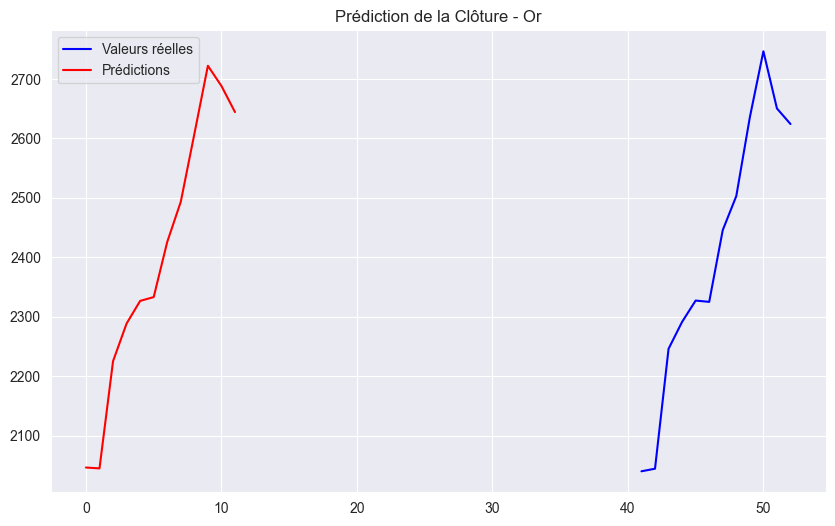

In [70]:
#Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_gold.index, y_test_gold, label='Valeurs réelles', color='blue')
plt.plot(y_pred_gold, label='Prédictions', color='red')
plt.title('Prédiction de la Clôture - Or')
plt.legend()
plt.show()

Minimisation des erreurs avec un gradient descent > modèle SGDRegressor de scikit learn

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# Normalisation des données
scaler = StandardScaler()
X_train_gold_scaled = scaler.fit_transform(X_train_gold)
X_test_gold_scaled = scaler.transform(X_test_gold)

# Entraînement du modèle avec les données normalisées
model_gold = SGDRegressor(max_iter=10000, tol=1e-4, eta0=0.0001)  # Ajuste le taux d'apprentissage si nécessaire
model_gold.fit(X_train_gold_scaled, y_train_gold)

# Afficher les coefficients et l'intercept
print(f"Coefficients : {model_gold.coef_}")
print(f"Intercept : {model_gold.intercept_}")



Coefficients : [20.87812452 27.16787037 33.1424304  28.8273499  24.64573494 -1.08590428]
Intercept : [1480.7502263]


C:\Users\bd_ta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [72]:
from sklearn.metrics import mean_squared_error

# Prédictions sur le test set
y_pred = model_gold.predict(X_test_gold_scaled)

# Calcul du MSE
mse = mean_squared_error(y_test_gold, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcul du RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 179247.87367575502
Root Mean Squared Error: 423.3767514587392


Prédiction du prix de clôture pour le S&P500 avec la régression linéaire

In [73]:
Features = ["Ouverture", "Haut", "Bas", "RSI", "Volatilité", "Rendement"]
X_sp500 = sp500_data [['Ouverture', 'Haut', 'Bas', 'Volatilité', 'Rendement', 'RSI']]  # Variables indépendantes
y_sp500 = sp500_data['Clôture']  # Variable cible

#Supression des données NaN car non gérées par le modèle
df_cleaned = df.dropna()

In [74]:
X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = train_test_split(X_sp500,y_sp500, test_size=0.2, random_state=42)

X_train_sp500 = X_train_sp500.dropna()
y_train_sp500 = y_train_sp500.loc[X_train_sp500.index]  # Ajuster y en conséquence
X_test_sp500 = X_test_sp500.dropna()
y_test_sp500 = y_test_sp500.loc[X_test_sp500.index]


In [75]:
model_sp500 = LinearRegression()
model_sp500.fit(X_train_sp500, y_train_sp500)

#Prédiction sur l'ensemble de test
y_pred_sp500 = model_sp500.predict(X_test_sp500)

In [76]:
from sklearn.model_selection import cross_val_score

X_sp500 = X_sp500.dropna()
y_sp500 = y_sp500.loc[X_sp500.index]  


scores = cross_val_score(model_sp500, X_sp500, y_sp500, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation croisée : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")


Scores de validation croisée : [ -3.12502456 -15.47402821 -19.36025167  -5.98761714 -21.37341112]
RMSE moyen : 3.4343212187084378


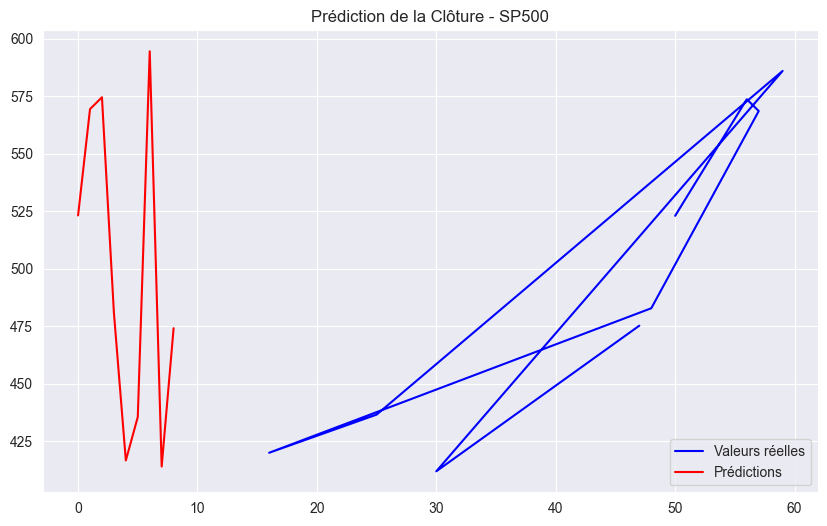

In [77]:
#Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_sp500.index, y_test_sp500, label='Valeurs réelles', color='blue')
plt.plot(y_pred_sp500, label='Prédictions', color='red')
plt.title('Prédiction de la Clôture - SP500')
plt.legend()
plt.show()

Régression linéaire pour prédiction de la valeur de clôture du bictoin

In [78]:
# Séparation des données par actif (Bitcoin, Or, S&P 500)
bitcoin_data = df_total[df_total['Actif'] == 'Bitcoin']

# Définition des features et de la cible
Features = ["Ouverture", "Haut", "Bas", "RSI", "Volatilité", "Rendement"]
X_bitcoin = bitcoin_data[Features]  # Variables indépendantes
y_bitcoin = bitcoin_data['Clôture']  # Variable cible

bitcoin_data = bitcoin_data.dropna(subset=['RSI', 'Volatilité', 'Rendement'])
X_bitcoin = bitcoin_data[Features]
y_bitcoin = bitcoin_data['Clôture']

# Vérifier si X_bitcoin a encore des NaN après le nettoyage
print(X_bitcoin.isna().sum())  

Ouverture     0
Haut          0
Bas           0
RSI           0
Volatilité    0
Rendement     0
dtype: int64


In [79]:
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(X_bitcoin,y_bitcoin, test_size=0.2, random_state=42)

In [80]:
model_bitcoin = LinearRegression()
model_bitcoin.fit(X_train_bitcoin, y_train_bitcoin)

#Prédiction sur l'ensemble de test
y_pred_bitcoin = model_bitcoin.predict(X_test_bitcoin)

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_bitcoin, X_bitcoin, y_bitcoin, cv=5, scoring='neg_mean_squared_error')
print(f"Scores de validation croisée : {scores}")
print(f"RMSE moyen : {np.mean(np.sqrt(-scores))}")

Scores de validation croisée : [-1.21788717e+07 -2.09052063e+06 -1.14773365e+07 -8.85429455e+06
 -2.32972414e+08]
RMSE moyen : 5312.5119280930985


In [82]:
#Calcul de l'erreur MSE et du score R²
test_mse = mean_squared_error(y_test_bitcoin, y_pred_bitcoin)
test_r2 = r2_score(y_test_bitcoin, y_pred_bitcoin)

print("Mean Squared Error:", test_mse)
print("R² Score:", test_r2)


Mean Squared Error: 4176111.8292596973
R² Score: 0.9852228423213245


Mean Squared Error élevée = la variable cible a des valeurs très grandes donc le chiffre est très élevé !

Visualisation des résultats

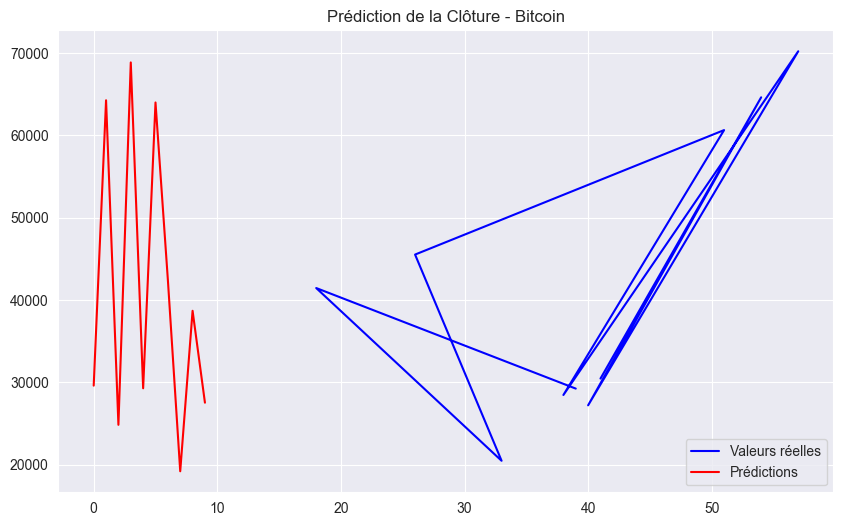

In [83]:
#Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_bitcoin.index, y_test_bitcoin, label='Valeurs réelles', color='blue')
plt.plot(y_pred_bitcoin, label='Prédictions', color='red')
plt.title('Prédiction de la Clôture - Bitcoin')
plt.legend()
plt.show()

Test d'un nouveau modèle : random forest

Import des librairies

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Sélection des données et définition des features et de la target

In [85]:
features = ["RSI", "Rendement", "Haut", "Bas", "Ouverture", "Volatilité"]
X_gold = gold_data[['Ouverture', 'Haut', 'Bas', 'RSI', 'Volatilité', 'Rendement']]  # Variables indépendantes
y_gold = gold_data['Clôture']  # Variable cible

#Vérif des variables de gold
print("Colonnes disponibles dans gold_data:", gold_data.columns)

Colonnes disponibles dans gold_data: Index(['Année', 'Mois', 'Ouverture', 'Haut', 'Bas', 'Clôture', 'Volume',
       'Actif', 'Rendement', 'Volatilité', 'RSI'],
      dtype='object')


Séparation des données

In [86]:
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X_gold, y_gold, test_size=0.2, random_state=42)

Modèle RandomForest

In [87]:
model_rf = RandomForestRegressor(n_estimators=500,  # Nombre d'arbres
                              max_depth=10,  # Limite la profondeur des arbres
                              min_samples_split=4,  # Nombre minimum d'échantillons pour diviser un nœud
                              random_state=42)  

Entraînement du modèle RandomForest

In [88]:
model_rf.fit(X_train_gold, y_train_gold)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=500,
                      random_state=42)

Prédiction

In [89]:
y_pred_gold = model_rf.predict(X_test_gold)

Evaluation du modèle

In [90]:
mse = mean_squared_error(y_test_gold, y_pred_gold)
print(f"Mean Squared Error: {mse}")

# Affichage des prédictions
print(f"Prédictions: {y_pred}")

Mean Squared Error: 4291.788135117828
Prédictions: [1650.91867558 1640.41407029 1791.49748407 1919.53067263 1939.5540128
 1918.09874233 2007.67154718 2058.45996429 2175.80731829 2279.19444635
 2221.70755145 2209.73888282]


Test d'un nouveau modèle temporel - ARIMA

In [91]:
import pandas as pd

# Créer la colonne Jour (car le modèle a besoin de jour/mois/année pour fonctionner)
gold_data = gold_data.assign(Jour=1)

# Afficher les types de données et vérifier les valeurs manquantes
print(gold_data[['Année', 'Mois', 'Jour']].dtypes)
print(gold_data[['Année', 'Mois', 'Jour']].isna().sum())

# S'assurer que les colonnes 'Année', 'Mois', 'Jour' sont bien des entiers
gold_data['Année'] = gold_data['Année'].astype(int)
gold_data['Mois'] = gold_data['Mois'].astype(int)
gold_data['Jour'] = gold_data['Jour'].astype(int)

# Utiliser pd.to_datetime avec un format explicite
gold_data['Date'] = pd.to_datetime(gold_data[['Année', 'Mois', 'Jour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

# Définir l'index sur la colonne 'Date'
gold_data.set_index('Date', inplace=True)

# Vérifier les premières lignes pour s'assurer du bon fonctionnement
print(gold_data.head())

Année    int64
Mois     int64
Jour     int64
dtype: object
Année    0
Mois     0
Jour     0
dtype: int64
            Année  Mois  Ouverture      Haut       Bas   Clôture  Volume  \
Date                                                                       
2020-01-01   2020     1   1520.425  1611.530  1518.515  1583.885       0   
2020-02-01   2020     2   1568.550  1689.360  1563.010  1585.060       0   
2020-03-01   2020     3   1582.255  1666.935  1575.440  1666.520       0   
2020-08-01   2020     8   2010.030  2010.180  1902.890  1967.700       0   
2020-09-01   2020     9   1967.930  1992.450  1848.560  1888.340       0   

           Actif  Rendement  Volatilité         RSI  Jour  
Date                                                       
2020-01-01    Or        NaN         NaN         NaN     1  
2020-02-01    Or   0.000742         NaN  100.000000     1  
2020-03-01    Or   0.051392         NaN  100.000000     1  
2020-08-01    Or   0.180724         NaN  100.000000     1  
20

In [92]:
# Garder seulement la colonne Clôture pour ARIMA
gold_close = gold_data['Clôture']

# Vérifier la stationnarité avec le test de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(gold_close.dropna())
print("P-Value du test Dickey-Fuller :", result[1])  # Si < 0.05, la série est stationnaire

P-Value du test Dickey-Fuller : 0.9897731988140743


0,93 > série non stationnaire > la structure ne reste pas la même avec le temps
Pour appliquer le modèle il faut la rendre stationnaire

In [93]:
gold_data['diff'] = gold_data['Clôture'].diff()

In [94]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller sur la série différenciée
result = adfuller(gold_data['diff'].dropna())
print(f'P-Value du test Dickey-Fuller après différenciation : {result[1]}')


P-Value du test Dickey-Fuller après différenciation : 2.6902702704602363e-10


Définition de l'ACF et PACF

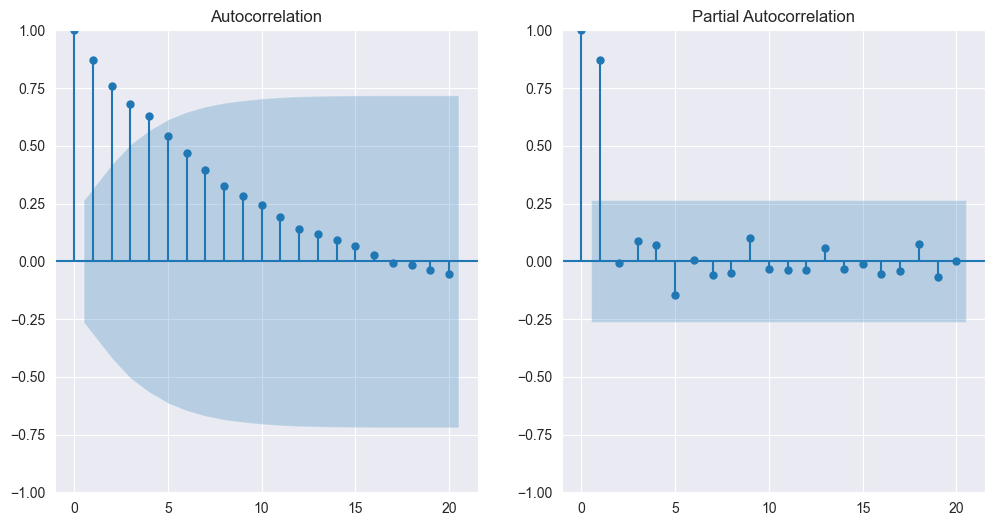

In [95]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualisation de l'ACF et de la PACF avec 20 lags
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(gold_data['Clôture'], lags=20, ax=plt.gca())

# PACF
plt.subplot(1, 2, 2)
plot_pacf(gold_data['Clôture'], lags=20, ax=plt.gca())

plt.show()


Test ADF (Dickey-Fuller) :
Statistique : -0.3959362090824337
P-valeur : 0.9107750770432413
⚠️ La série n'est PAS stationnaire (p > 0.05). Différenciation appliquée.


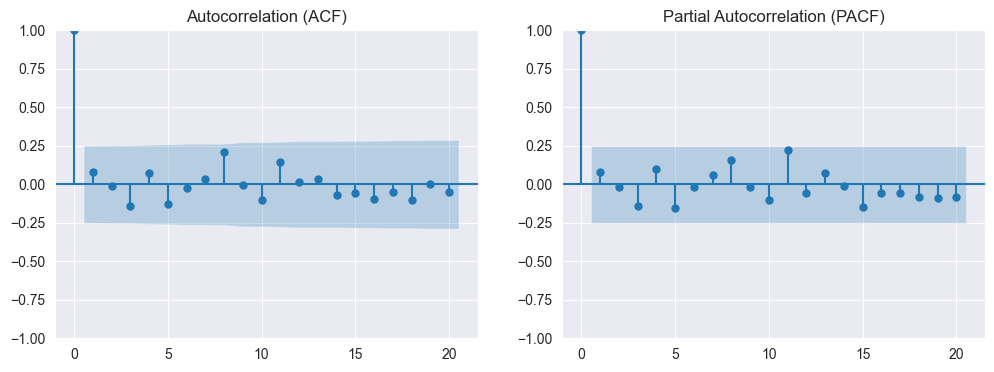

🚀 Entraînement du modèle ARIMA avec (p=1, d=1, q=1)...
                               SARIMAX Results                                
Dep. Variable:                Clôture   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -623.675
Date:                Thu, 13 Feb 2025   AIC                           1253.351
Time:                        20:23:31   BIC                           1259.634
Sample:                    02-01-2020   HQIC                          1255.808
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0831      0.206      0.403      0.687      -0.321       0.487
ma.L1         -0.9680      0.121     -8.026      0.000      -1.204      -0.7

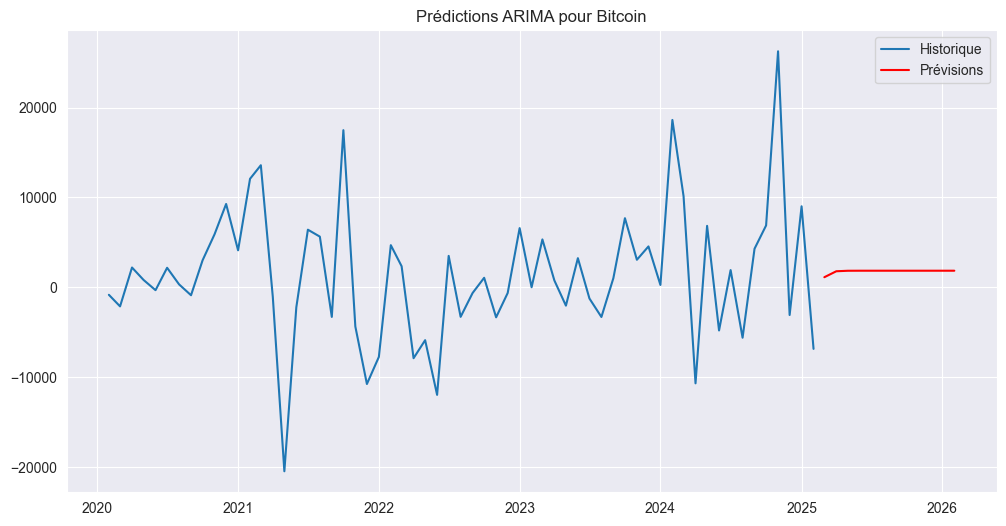

In [98]:
# 📌 Importation des bibliothèques
import pandas as pd  # Manipulation des données CSV
import numpy as np  # Calculs numériques
import statsmodels.api as sm  # Modélisation statistique
import matplotlib.pyplot as plt  # Visualisation des résultats
from statsmodels.tsa.arima.model import ARIMA  # Modèle ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Tests statistiques pour séries temporelles

# 📂 Définition des fichiers CSV pour différents actifs financiers
files = {
    "Bitcoin": "Bitcoin_5_ans_par_mois.csv",
    "Or": "Or_5_ans_par_mois.csv",
    "S&P 500": "S&P 500_5_ans_par_mois.csv"
}

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # 🔹 Créer une colonne "Date" en combinant "Année" et "Mois"
    df["Date"] = pd.to_datetime(df["Année"].astype(str) + "-" + df["Mois"].astype(str) + "-01")
    df.set_index("Date", inplace=True)  # Définir "Date" comme index temporel

    # 🔹 Définir explicitement la fréquence mensuelle
    df.index = pd.to_datetime(df.index)  # Convertir en format datetime si ce n'est pas le cas
    df = df.asfreq("MS")  # Force une fréquence mensuelle (Month Start)

    # 🔹 Sélection de la colonne "Clôture" pour l'analyse ARIMA
    df = df[["Clôture"]].dropna()  # Supprime les valeurs manquantes

    return df

# 🏆 Sélection de l'actif à analyser (Modifier selon le besoin)
asset_name = "Bitcoin"  # Remplacer par "Or" ou "S&P 500"
df = load_and_prepare_data(files[asset_name])

# 📈 Test de stationnarité avec Augmented Dickey-Fuller (ADF)
def test_stationarity(series):
    result = adfuller(series)  # Appliquer le test ADF
    print("Test ADF (Dickey-Fuller) :")
    print(f"Statistique : {result[0]}")  # Statistique du test
    print(f"P-valeur : {result[1]}")  # P-valeur du test
    if result[1] > 0.05:  # Seuil de signification 5%
        print("⚠️ La série n'est PAS stationnaire (p > 0.05). Différenciation appliquée.")
        return series.diff().dropna(), True  # Appliquer une différenciation si nécessaire
    else:
        print("✅ La série est stationnaire (p <= 0.05)")
        return series, False  # Aucun traitement supplémentaire nécessaire

df['Clôture'], differentiated = test_stationarity(df['Clôture'])

# 📊 Analyse ACF et PACF pour choisir p et q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 🔹 ACF (AutoCorrelation Function) pour identifier q (MA)
sm.graphics.tsa.plot_acf(df['Clôture'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation (ACF)")

# 🔹 PACF (Partial AutoCorrelation Function) pour identifier p (AR)
sm.graphics.tsa.plot_pacf(df['Clôture'].dropna(), lags=20, ax=axes[1])
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()  # Afficher les graphiques pour aider au choix des paramètres

# ⚙️ Définition des paramètres ARIMA en fonction des graphiques ACF/PACF
p = 1  # Si PACF coupe après lag 1
d = 1 if differentiated else 0  # Applique d=1 si différenciation nécessaire
q = 1  # Si ACF coupe après lag 1

# 🔥 Entraînement du modèle ARIMA avec les paramètres sélectionnés
print(f"🚀 Entraînement du modèle ARIMA avec (p={p}, d={d}, q={q})...")
model = ARIMA(df['Clôture'].dropna(), order=(p, d, q))
model_fit = model.fit()

# 📜 Affichage du résumé du modèle ARIMA
print(model_fit.summary())

# 📅 Génération de prévisions sur 12 mois
forecast_steps = 12  # Nombre de mois à prévoir
forecast = model_fit.forecast(steps=forecast_steps)  # Génération des prévisions

# 📊 Affichage des prévisions ARIMA
plt.figure(figsize=(12,6))
plt.plot(df, label="Historique")  # Données réelles
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="MS")[1:], forecast, label="Prévisions", color='red')  # Prédictions
plt.legend()
plt.title(f"Prédictions ARIMA pour {asset_name}")
plt.show()


In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer les erreurs quadratiques moyennes (RMSE)
predictions = model_fit.predict(start=0, end=len(bitcoin_data)-1)
rmse = np.sqrt(mean_squared_error(bitcoin_data['Clôture'], predictions))
print(f"RMSE: {rmse}")


RMSE: 50095.37131656162
